In [12]:
print("hello world")

hello world


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report


# Step 1: Load the dataset
file_path = 'emails.csv'
data = pd.read_csv('emails.csv')

# Step 2: Split the data into X (features) and y (labels)
X = data['text']
y = data['spam']

# Step 3: Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_transformed = vectorizer.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 5: Train a Naive Bayes model (Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Evaluate the model using the test set
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 7: Function to classify new user input
def classify_email(email_text):
    # Transform the user input using the same vectorizer
    email_transformed = vectorizer.transform([email_text])
    
    # Predict whether it's spam or not
    prediction = model.predict(email_transformed)
    
    # Return the result
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Step 8: Take user input and classify
while True:
    user_input = input("Enter an email text to classify (or type 'exit' to stop): ")
    
    if user_input.lower() == 'exit':
        print("Exiting...")
        break
    
    result = classify_email(user_input)
    print(f"The entered email is classified as: {result}")


Confusion Matrix:
 [[856   0]
 [117 173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       856
           1       1.00      0.60      0.75       290

    accuracy                           0.90      1146
   macro avg       0.94      0.80      0.84      1146
weighted avg       0.91      0.90      0.89      1146

The entered email is classified as: Not Spam
Exiting...


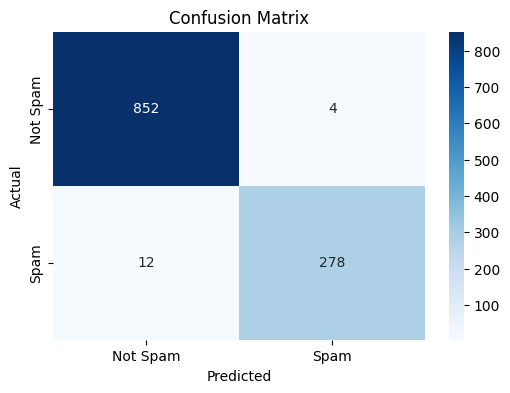

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 6: Evaluate the model using the test set (if not done already)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Spam', 'Spam'], 
                yticklabels=['Not Spam', 'Spam'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Call the function to plot the confusion matrix
plot_confusion_matrix(conf_matrix)


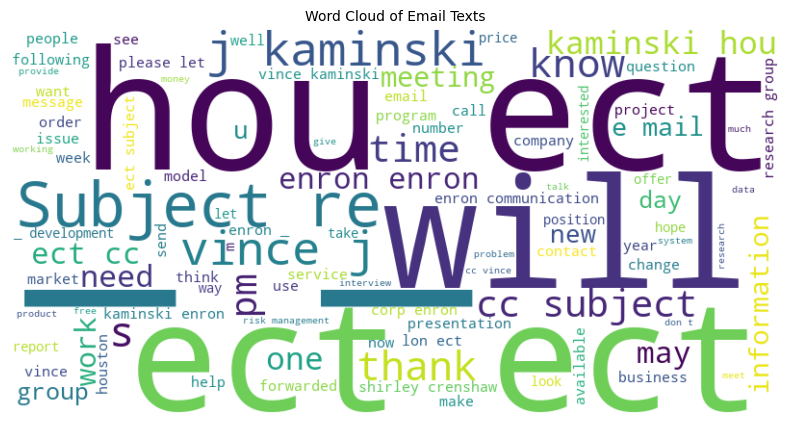

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all the email texts into a single string
all_words = ' '.join(X)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis lines, labels or ticks
plt.title('Word Cloud of Email Texts', fontsize=10)
plt.show()



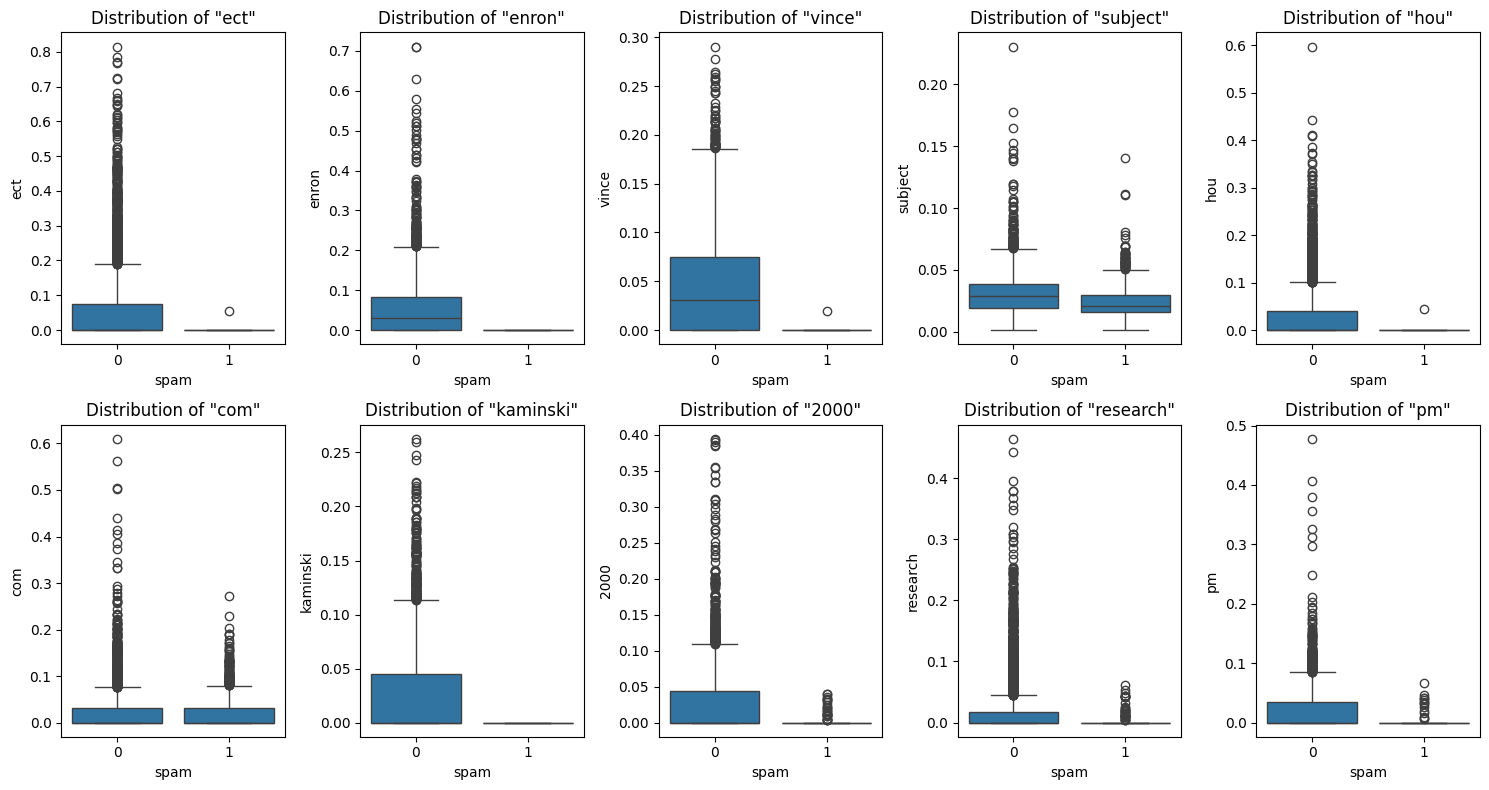

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the TF-IDF transformed data into a DataFrame for easier handling
X_df = pd.DataFrame(X_transformed.toarray(), columns=vectorizer.get_feature_names_out())

# Add the target variable (spam or not) to the DataFrame
X_df['spam'] = y.values

# Plot box plots for the top N features
top_n = 10
top_features = X_df.drop('spam', axis=1).sum().sort_values(ascending=False).head(top_n).index

plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_features):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x='spam', y=feature, data=X_df)
    plt.title(f'Distribution of "{feature}"')

plt.tight_layout()
plt.show()


# Tried with Random Forest Classification to detect precisely.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Load the dataset
file_path = 'emails.csv'
data = pd.read_csv('emails.csv')

# Step 2: Split the data into X (features) and y (labels)
X = data['text']
y = data['spam']

# Step 3: Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_transformed = vectorizer.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 5: Train a RandomForest model with class_weight='balanced'
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model using the test set
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 7: Function to classify new user input
def classify_email(email_text):
    # Transform the user input using the same vectorizer
    email_transformed = vectorizer.transform([email_text])
    
    # Predict whether it's spam or not
    prediction = model.predict(email_transformed)
    
    # Return the result
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Step 8: Take user input and classify
while True:
    user_input = input("Enter an email text to classify (or type 'exit' to stop): ")
    
    if user_input.lower() == 'exit':
        print("Exiting...")
        break
    
    result = classify_email(user_input)
    print(f"The entered email is classified as: {result}")


Confusion Matrix:
 [[852   4]
 [ 12 278]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.96      0.97       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146

The entered email is classified as: Spam
The entered email is classified as: Spam
Exiting...
